In [ ]:
import csv
import pandas as pd

In [ ]:
url='https://www.opendata.nhs.scot/dataset/6dbdd466-45e3-4348-9ee3-1eac72b5a592/resource/42f17a3c-a4db-4965-ba68-3dffe6bca13a/download/daily_vacc_scot_20211117.csv'
data= pd.read_csv(url)
data




Date    Country  ... CumulativePercentCoverage            AgeBand
0     20201208  S92000003  ...                       NaN   All vaccinations
1     20201208  S92000003  ...                       NaN   All vaccinations
2     20201208  S92000003  ...                       NaN   All vaccinations
3     20201208  S92000003  ...                       NaN   All vaccinations
4     20201208  S92000003  ...                       NaN   All vaccinations
...        ...        ...  ...                       ...                ...
7366  20211123  S92000003  ...                 82.404682  12 years and over
7367  20211123  S92000003  ...                       NaN   All vaccinations
7368  20211123  S92000003  ...                 33.804677  18 years and over
7369  20211123  S92000003  ...                 58.829425  50 years and over
7370  20211123  S92000003  ...                 31.404881  12 years and over

[7371 rows x 10 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7371 entries, 0 to 7370
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        7371 non-null   int64  
 1   Country                     7371 non-null   object 
 2   Product                     7371 non-null   object 
 3   Population                  3159 non-null   float64
 4   Dose                        7371 non-null   object 
 5   NumberVaccinated            7371 non-null   int64  
 6   PercentCoverage             3159 non-null   float64
 7   CumulativeNumberVaccinated  7371 non-null   int64  
 8   CumulativePercentCoverage   3159 non-null   float64
 9   AgeBand                     7371 non-null   object 
dtypes: float64(3), int64(3), object(4)
memory usage: 576.0+ KB


In [ ]:
print('This dataset was colelcted from' , data.Date.min(), ' to ' , data.Date.max())

This dataset was colelcted from 20201208  to  20211123


In [ ]:
print('Doses captured in the data are: \n', data.Dose.unique())

Doses captured in the data are: 
 ['Dose 1' 'Dose 2' 'Dose 3 and Booster']


In [ ]:
print('products captured in the data are: \n', data.Product.unique())

products captured in the data are: 
 ['AstraZeneca (Vaxzevria)' 'Moderna (Spikevax)'
 'Pfizer BioNTech (Comirnaty)' 'Total']


In [ ]:
print('Different age groupings used in the data are: \n', data.AgeBand.unique())

Different age groupings used in the data are: 
 ['All vaccinations' '18 years and over' '50 years and over'
 '12 years and over']


In [ ]:
#Creating subset for Records for agegroup All vaccinations of all products
Daily_12_over= data[(data.AgeBand == '12 years and over') ]
print(Daily_12_over)

          Date    Country  ... CumulativePercentCoverage            AgeBand
12    20201208  S92000003  ...                  0.040536  12 years and over
16    20201208  S92000003  ...                  0.000000  12 years and over
20    20201208  S92000003  ...                  0.000000  12 years and over
33    20201209  S92000003  ...                  0.121421  12 years and over
37    20201209  S92000003  ...                  0.000000  12 years and over
...        ...        ...  ...                       ...                ...
7345  20211122  S92000003  ...                 82.377776  12 years and over
7349  20211122  S92000003  ...                 30.724061  12 years and over
7362  20211123  S92000003  ...                 90.659918  12 years and over
7366  20211123  S92000003  ...                 82.404682  12 years and over
7370  20211123  S92000003  ...                 31.404881  12 years and over

[1053 rows x 10 columns]


In [ ]:
print('products captured in the data are: \n', Daily_12_over.Product.unique())

products captured in the data are: 
 ['Total']


In [ ]:

Dose1=Daily_12_over[Daily_12_over.Dose == 'Dose 1']
Dose2=Daily_12_over[Daily_12_over.Dose == 'Dose 2']
Dose3_boost=Daily_12_over[Daily_12_over.Dose == 'Dose 3 and Booster']

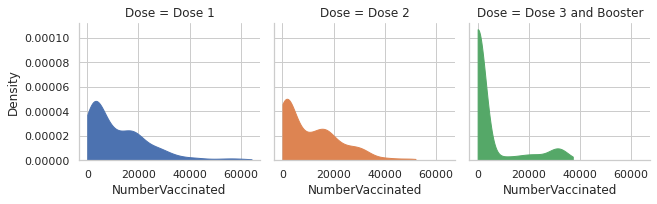

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid") #setting theme as seaborn whitegrid 

plot = sns.FacetGrid(Daily_12_over, col='Dose', hue='Dose', col_wrap=4)
plot = plot.map(sns.kdeplot,"NumberVaccinated", cut=0, fill=True, common_norm=False, alpha=1, legend=False)

plt.show()

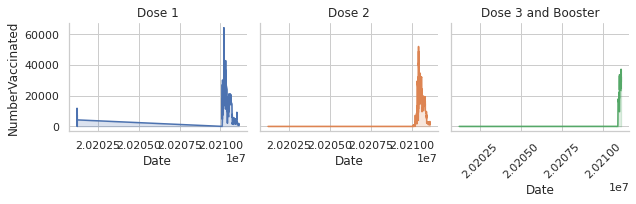

In [ ]:
# Creating and initializing a grid 
plot = sns.FacetGrid(Daily_12_over, col='Dose', hue='Dose' )
plt.xticks(rotation=45) 
# using plot function to add line over the area   
plot = plot.map(plt.plot, 'Date', 'NumberVaccinated')

# using fill_between to Fill the area 
plot = plot.map(plt.fill_between, 'Date', 'NumberVaccinated', alpha=0.2).set_titles("{col_name} Dose")
 
# Controlling the title of each facet
plot = plot.set_titles("{col_name}")

# Show the graph
plt.show()

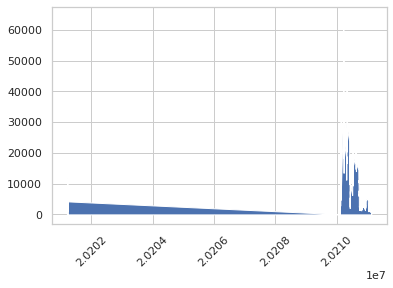

In [ ]:
# Create data
x=Dose1.Date
y=Dose1.NumberVaccinated

# Area plot
plt.fill_between(x, y)
plt.xticks(rotation=45) 
plt.show()

In [ ]:
#Timing and number of vaccinations
!pip install altair
import altair as alt
#change "time" format

# data['Date']=pd.to_datetime(data['Date'], format='%Y%m%d')
# data['Date']

# alt.data_transformers.disable_max_rows()
# alt.Chart(data).mark_line().encode(x='Date',y='NumberVaccinated')


Dose1['Date']=pd.to_datetime(Dose1['Date'], format='%Y%m%d')
Dose1['Date']

alt.data_transformers.disable_max_rows()
alt.Chart(Dose1).mark_line().encode(x='Date',y='NumberVaccinated')



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


alt.Chart(...)

In [ ]:
stocks = data.stocks()
source = stocks.groupby([pd.Grouper(key="date", freq="6M"),"Dose"]).mean().reset_index()

alt.Chart(source).mark_line(point = True).encode(
    x = alt.X("date:O", timeUnit="yearmonth", title="date"),
    y="rank:O",
    color=alt.Color("symbol:N")
).transform_window(
    rank="rank()",
    sort=[alt.SortField("price", order="descending")],
    groupby=["date"]
).properties(
    title="Bump Chart for Stock Prices",
    width=600,
    height=150,
)

https://git.ecdf.ed.ac.uk/covid-19-ds4d/assignment3n4/-/blob/main/Assignment2-2.ipynb

In [ ]:
#Timing and number of vaccinations
!pip install altair
import altair as alt
#change "time" format


Dose2['Date']=pd.to_datetime(Dose2['Date'], format='%Y%m%d')
Dose2['Date']

alt.data_transformers.disable_max_rows()
alt.Chart(Dose2).mark_line().encode(x='Date',y='NumberVaccinated')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


alt.Chart(...)

In [ ]:
#Timing and number of vaccinations
!pip install altair
import altair as alt
#change "time" format


Dose3_boost['Date']=pd.to_datetime(Dose3_boost['Date'], format='%Y%m%d')
Dose3_boost['Date']

alt.data_transformers.disable_max_rows()
alt.Chart(Dose3_boost).mark_line().encode(x='Date',y='NumberVaccinated')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


alt.Chart(...)

In [ ]:
brush = alt.selection(type='interval')

points = alt.Chart().mark_point().encode(
    alt.X('temp_max:Q', title='Date'),
    alt.Y('temp_range:Q', title='Number vaccinated'),
    color=alt.condition(brush, 'weather:N', alt.value('lightgray'), scale=scale),
    size=alt.Size('precipitation:Q', scale=alt.Scale(range=[1, 200]))
).transform_calculate(
    "temp_range", "datum.temp_max - datum.temp_min"
).properties(
    width=600,
    height=400
).add_selection(
    brush
)

bars = alt.Chart().mark_bar().encode(
    x='count()',
    y='weather:N',
    color=alt.Color('weather:N', scale=scale),
).transform_calculate(
    "temp_range", "datum.temp_max - datum.temp_min"
).transform_filter(
    brush
).properties(
    width=600
)

alt.vconcat(points, bars, data=df)